### 1. Extracting Twitter Data

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import scipy
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Twitter App access keys for @user# Twitt 

# Consume:
CONSUMER_KEY    = 'D7PQj2xuuw2CQunHiLFCUyy8v'
CONSUMER_SECRET = '0u9PwH9JhLsvndnsRv5tF2NyoH7KJim2CruJ4zVE7TsMZetHFi'

# Access:
ACCESS_TOKEN  = '2163444086-30rJ2fINs8CNQiCslKpIMcSGC3eeqMMaQRLWesH'
ACCESS_SECRET = 'aQOkHU0pH5q5vEto6VnlNZYlUOm6EdrI5lPMDatFtk1dn'

In [3]:
# We import our access keys:
#from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [4]:
# We create an extractor object:# We cr 
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

I had a GREAT meeting with Putin and the Fake News used every bit of their energy to try and disparage it. So bad for our country!

.@PeteHegseth on @FoxNews  “Source #1 was the (Fake) Dossier. Yes, the Dirty Dossier, paid for by Democrats as a hi… https://t.co/cts37TsoLn

Andrew McCarthy - “I said this could never happen. This is so bad that they should be looking at the judges who sig… https://t.co/U4BO2BFPph

Looking more &amp; more like the Trump Campaign for President was illegally being spied upon (surveillance) for the pol… https://t.co/36aqUFnEI9

Congratulations to @JudicialWatch and @TomFitton on being successful in getting the Carter Page FISA documents. As… https://t.co/Ra2PCplr4S



In [5]:
# We create a pandas dataframe as follows:# We cr 
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(20))

,Tweets
0,I had a GREAT meeting with Putin and the Fake ...
1,.@PeteHegseth on @FoxNews “Source #1 was the ...
2,Andrew McCarthy - “I said this could never hap...
3,Looking more &amp; more like the Trump Campaig...
4,Congratulations to @JudicialWatch and @TomFitt...
5,Troy Balderson of Ohio is running for Congress...
6,"Brian Kemp, who is running for Governor of Geo..."
7,"No Collusion, No Obstruction - but that doesn’..."
8,"The Rigged Witch Hunt, headed by the 13 Angry ..."
9,Inconceivable that the government would break ...


In [6]:
# Internal methods of a single tweet object:# Inter 
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [7]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1021020863733420032
2018-07-22 13:15:18
Twitter for iPhone
50075
11394
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [8]:
# We add relevant data:# We add 
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['Retweets']    = np.array([tweet.retweet_count for tweet in tweets])

In [9]:
# Display of first 10 elements from dataframe:
display(data.head(20))

,Tweets,len,ID,Date,Source,Likes,Retweets
0,I had a GREAT meeting with Putin and the Fake ...,130,1021020863733420032,2018-07-22 13:15:18,Twitter for iPhone,50075,11394
1,.@PeteHegseth on @FoxNews “Source #1 was the ...,140,1021016070134648833,2018-07-22 12:56:15,Twitter for iPhone,38396,11458
2,Andrew McCarthy - “I said this could never hap...,140,1021007656511852544,2018-07-22 12:22:49,Twitter for iPhone,57080,17974
3,Looking more &amp; more like the Trump Campaig...,144,1020984152357777408,2018-07-22 10:49:25,Twitter for iPhone,65883,19144
4,Congratulations to @JudicialWatch and @TomFitt...,139,1020978929736265729,2018-07-22 10:28:40,Twitter for iPhone,52000,16137
5,Troy Balderson of Ohio is running for Congress...,143,1020811550771294211,2018-07-21 23:23:34,Twitter for iPhone,75042,20976
6,"Brian Kemp, who is running for Governor of Geo...",135,1020808378594054144,2018-07-21 23:10:57,Twitter for iPhone,50878,12984
7,"No Collusion, No Obstruction - but that doesn’...",140,1020803264617615360,2018-07-21 22:50:38,Twitter for iPhone,79155,23210
8,"The Rigged Witch Hunt, headed by the 13 Angry ...",140,1020800615226793986,2018-07-21 22:40:06,Twitter for iPhone,74239,19877
9,Inconceivable that the government would break ...,140,1020642287725043712,2018-07-21 12:10:58,Twitter for iPhone,164671,38092


### 2. Visualization and Basic Statistics

In [10]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 126.09


In [11]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['Retweets'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.Retweets == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of likes: 318360
65 characters.

The tweet with more retweets is: 
RT @realDonaldTrump: They just didn't get it, but they do now! https://t.co/9T50NupkDy
Number of retweets: 109133
86 characters.



In [12]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['Retweets'].values, index=data['Date'])

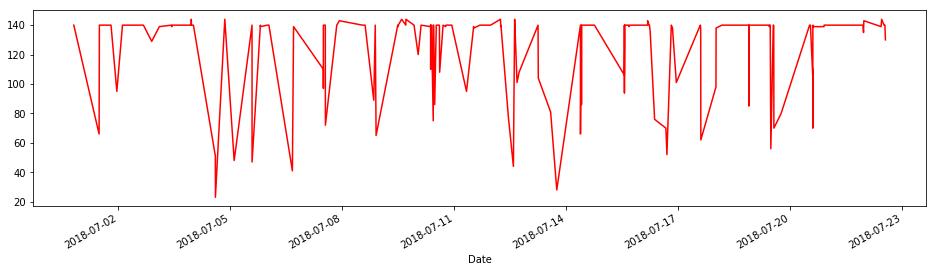

In [13]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

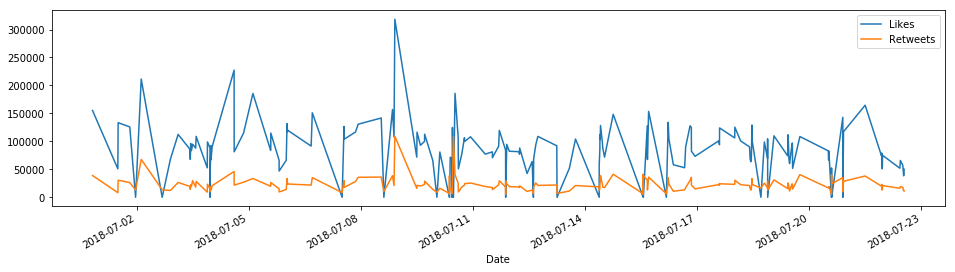

In [14]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### 3. Sentiment Analysis

In [15]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [16]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,Retweets,SA
0,I had a GREAT meeting with Putin and the Fake ...,130,1021020863733420032,2018-07-22 13:15:18,Twitter for iPhone,50075,11394,-1
1,.@PeteHegseth on @FoxNews “Source #1 was the ...,140,1021016070134648833,2018-07-22 12:56:15,Twitter for iPhone,38396,11458,-1
2,Andrew McCarthy - “I said this could never hap...,140,1021007656511852544,2018-07-22 12:22:49,Twitter for iPhone,57080,17974,-1
3,Looking more &amp; more like the Trump Campaig...,144,1020984152357777408,2018-07-22 10:49:25,Twitter for iPhone,65883,19144,1
4,Congratulations to @JudicialWatch and @TomFitt...,139,1020978929736265729,2018-07-22 10:28:40,Twitter for iPhone,52000,16137,1
5,Troy Balderson of Ohio is running for Congress...,143,1020811550771294211,2018-07-21 23:23:34,Twitter for iPhone,75042,20976,-1
6,"Brian Kemp, who is running for Governor of Geo...",135,1020808378594054144,2018-07-21 23:10:57,Twitter for iPhone,50878,12984,1
7,"No Collusion, No Obstruction - but that doesn’...",140,1020803264617615360,2018-07-21 22:50:38,Twitter for iPhone,79155,23210,-1
8,"The Rigged Witch Hunt, headed by the 13 Angry ...",140,1020800615226793986,2018-07-21 22:40:06,Twitter for iPhone,74239,19877,1
9,Inconceivable that the government would break ...,140,1020642287725043712,2018-07-21 12:10:58,Twitter for iPhone,164671,38092,1


#### Analyzing the results

In [17]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [18]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 47.0%
Percentage of neutral tweets: 33.0%
Percentage de negative tweets: 20.0%
